# Analyse descriptive

Ce notebook est consacré à plusieurs analyses descriptives des données de la Formula 1 depuis 2018. Trois axes principaux sont abordés :

- Analyse descriptive de la météo : Cette section explore les statistiques liées aux conditions météorologiques lors des courses, ainsi que leur distribution. Un boxplot est également présenté pour visualiser la variabilité des conditions de course.

- Analyse descriptive des courses : Nous analysons le nombre de courses par saison depuis 2018 et identifions les grands prix clés de chaque saison. Cette analyse permet de mieux comprendre l'évolution du nombre de courses et les événements majeurs survenus dans le championnat.

- Analyse descriptive des résultats : Cette partie se concentre sur les performances des pilotes depuis 2018. Nous calculons des statistiques pour le classement des pilotes et présentons le Top 10 des pilotes ainsi que les champions de chaque saison. L'objectif est d'identifier les pilotes ayant marqué l'histoire récente de la Formula 1.

Ces analyses descriptives visent à fournir une vue d'ensemble des tendances et des évolutions dans le monde de la Formula 1, en mettant l'accent sur les aspects météorologiques, les courses et les performances des pilotes.

## 1. Chargement des packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Chargement des données

In [2]:
# Chargement des données 
meteo_cleaned = pd.read_csv('Cleaned_Data/meteo_cleaned.csv')
courses_cleaned = pd.read_csv('Cleaned_Data/courses_cleaned.csv')
pilotes_cleaned = pd.read_csv('Cleaned_Data/pilotes_cleaned.csv')
resultat_cleaned = pd.read_csv('Cleaned_Data/resultat_cleaned.csv')
laps_times_cleaned = pd.read_csv('Cleaned_Data/laps_times_cleaned.csv')
status_cleaned = pd.read_csv('Cleaned_Data/status_cleaned.csv')

# Afficher les dimensions de chaque dataset
print("Dimensions de 'meteo' :", meteo_cleaned.shape)
print("Dimensions de 'courses' :", courses_cleaned.shape)
print("Dimensions de 'pilotes' :", pilotes_cleaned.shape)
print("Dimensions de 'resultats' :", resultat_cleaned.shape)
print("Dimensions de 'laps_times' :", laps_times_cleaned.shape)
print("Dimensions de 'status' :", status_cleaned.shape)

Dimensions de 'meteo' : (18220, 10)
Dimensions de 'courses' : (149, 7)
Dimensions de 'pilotes' : (859, 4)
Dimensions de 'resultats' : (26519, 9)
Dimensions de 'laps_times' : (575029, 6)
Dimensions de 'status' : (139, 2)


## 1. Analyse descriptive du meteo

In [3]:
# Afficher les premières lignes
meteo_cleaned.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Round Number,Year
0,0 days 00:00:57.060000,24.1,36.2,997.1,False,38.2,294,3.0,1,2018
1,0 days 00:01:57.078000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
2,0 days 00:02:57.090000,24.0,36.3,997.1,False,38.6,273,1.4,1,2018
3,0 days 00:03:57.106000,23.9,37.2,997.0,False,38.7,287,2.3,1,2018
4,0 days 00:04:57.121000,24.2,35.8,997.1,False,38.7,309,3.5,1,2018


### 1.1 Statistiques descriptives

In [4]:
# Statistiques descriptives pour les variables numériques
meteo_cleaned.describe()

,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Round Number,Year
count,18220.000000,18220.000000,18220.000000,18220.000000,18220.000000,18220.000000,18220.000000,18220.000000
mean,23.661465,55.770692,1003.965368,34.556811,171.775521,1.672849,10.689133,2021.338749
std,5.085639,17.062601,14.715938,8.795537,105.520129,1.186057,6.047923,1.952609
min,9.200000,5.000000,959.900000,13.800000,0.000000,0.000000,1.000000,2018.000000
25%,19.700000,44.000000,995.900000,28.700000,93.000000,0.800000,5.000000,2020.000000
50%,24.000000,56.000000,1008.500000,34.000000,167.000000,1.400000,11.000000,2022.000000
75%,27.700000,66.200000,1014.900000,41.000000,263.000000,2.200000,15.000000,2023.000000
max,37.200000,97.500000,1023.500000,67.000000,359.000000,10.100000,24.000000,2024.000000


##### Interprétation des statistiques 

- AirTemp (Température de l'air) :
Moyenne de 23.66°C, variant de 9.2°C (min) à 37.2°C (max), avec une majorité des valeurs entre 19.7°C (25%) et 27.7°C (75%), ce qui indique des températures modérées à chaudes.

- Humidity (Humidité) :
Moyenne de 55.77%, avec une grande dispersion (écart-type de 17.06%), allant de 5% (min) à 97.5% (max). La plupart des valeurs sont concentrées entre 44% et 66.2%.

- Pressure (Pression) :
Moyenne de 1003.97 hPa, avec une faible variation (écart-type de 14.72), indiquant une pression atmosphérique relativement stable, majoritairement entre 995.9 hPa et 1014.9 hPa.

- TrackTemp (Température de la piste) :
Moyenne de 34.56°C, allant de 13.8°C à 67.0°C, montrant une large plage. La plupart des valeurs se situent entre 28.7°C et 41.0°C, ce qui reflète des conditions souvent chaudes.

- WindDirection (Direction du vent) :
Moyenne de 171.78°, couvrant toute la plage de 0° à 359°. L'écart-type élevé (105.52°) montre des directions de vent très variées.

- WindSpeed (Vitesse du vent) :
Moyenne de 1.67 m/s, avec des valeurs majoritairement faibles, bien que des vitesses extrêmes atteignent 10.1 m/s. La plupart des vitesses sont comprises entre 0.8 m/s et 2.2 m/s.

- Round Number (Numéro de la manche) :
Moyenne de 10.69, allant de 1 à 24, indiquant que les données couvrent plusieurs manches d'une saison de F1.

- Year (Année) :
Données s’étalant de 2018 à 2024, avec une moyenne en 2021, montrant une bonne couverture temporelle.

Ces statistiques mettent en évidence une cohérence générale des conditions météorologiques avec quelques variations extrêmes possibles.

### 1.2 Analyse Univarié

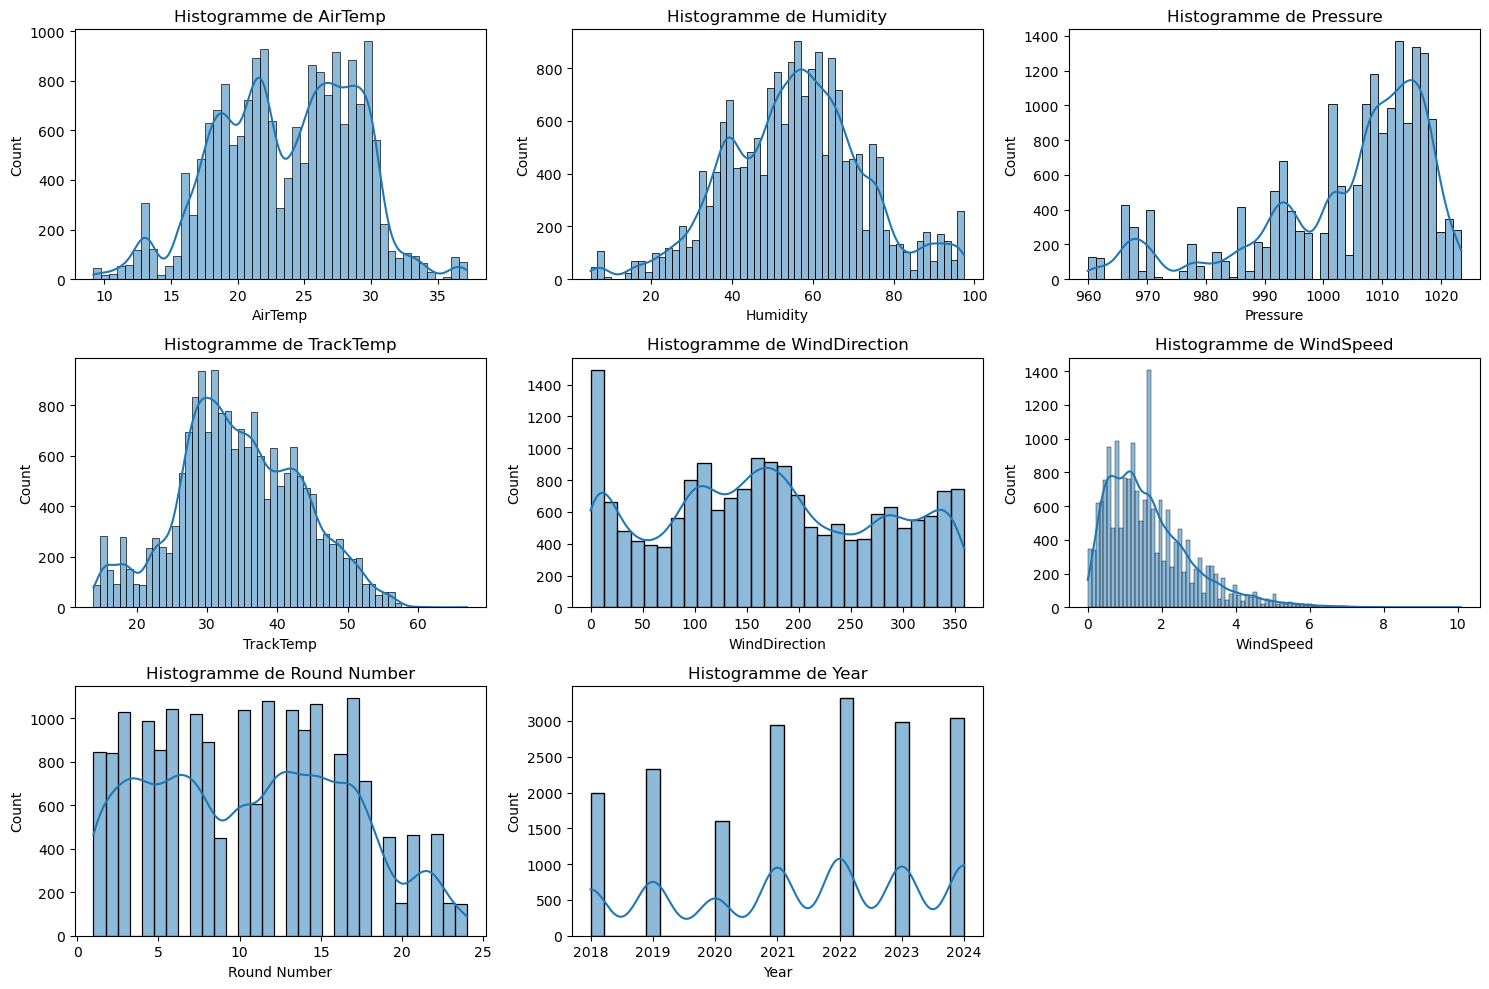

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_single_dimension_data(df):
    """
    Visualisation des données à une dimension pour chaque colonne numérique d'un DataFrame.
    
    Parameters:
    df (DataFrame) : Le DataFrame contenant les données numériques à visualiser.
    """
    # Sélectionner les colonnes numériques
    numeric_columns = df.select_dtypes(['int', 'float'])
    
    # Créer une figure avec plusieurs sous-graphes
    plt.figure(figsize=(15, 10))
    
    # Itérer sur chaque colonne numérique et afficher un graphique en ligne ou un histogramme
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot(3, 3, i + 1)  # Disposer les graphiques en grille
        if 'Time' in column:  # Si la colonne est temporelle, un plot en ligne peut être plus pertinent
            plt.plot(df['Time'], df[column], label=column)
            plt.title(f'Courbe de {column}')  # Titre pour chaque graphique
            plt.xlabel('Temps')
            plt.ylabel(column)
        else:
            sns.histplot(df[column], kde=True)  # Histogramme avec une courbe de densité
            plt.title(f'Histogramme de {column}')  # Titre pour chaque graphique
            plt.xlabel(column)
        
        plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes
    
    # Afficher les graphiques
    plt.show()
    
# Utilisation de la fonction
visualize_single_dimension_data(meteo_cleaned)

##### Interprétation des distributions :
- WindSpeed (Vitesse du vent) : La distribution est asymétrique, avec la majorité des valeurs faibles et quelques valeurs élevées.

- Autres variables (humidity, pressure, tracktemp, airtemp) : Les distributions sont de forme variable, sans tendance claire, ce qui indique une diversité dans les conditions météorologiques.

### 1.3 Boxplot

In [7]:
def plot_boxplots(df):
    """
    Visualisation des boxplots pour chaque colonne numérique d'un DataFrame.
    
    Parameters:
    df (DataFrame) : Le DataFrame contenant les données numériques pour lesquelles générer les boxplots.
    """
    # Sélectionner les colonnes numériques
    numeric_columns = df.select_dtypes(['int', 'float'])
    
    # Créer une figure avec plusieurs sous-graphes
    plt.figure(figsize=(15, 10))
    
    # Itérer sur chaque colonne numérique et afficher le boxplot
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot(3, 3, i + 1)  # Disposer les boxplots en grille
        sns.boxplot(data=df, x=column)  # Boxplot pour chaque colonne
        plt.title(f'Boxplot de {column}')  # Titre pour chaque boxplot
    
    # Ajuster l'espacement entre les sous-graphes
    plt.tight_layout()
    
    # Afficher les graphiques
    plt.show()

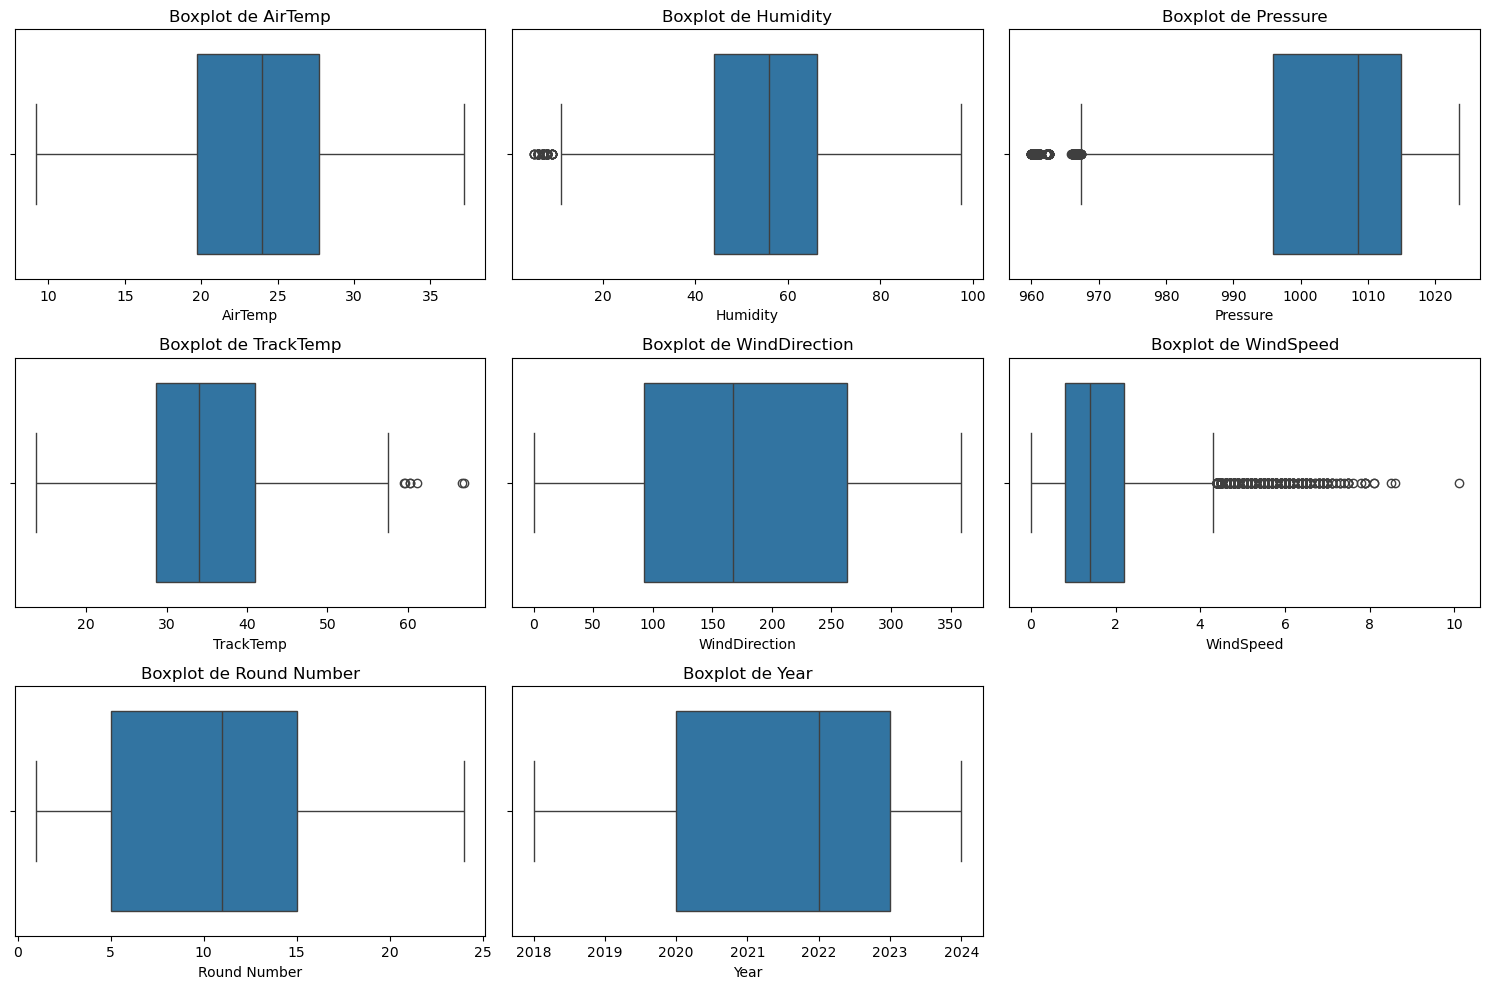

In [8]:
# Utilisation de la fonction
plot_boxplots(meteo_cleaned)

Interprétation des Boxplots
- Humidity (Humidité) :
Des valeurs extrêmes sont observées, mais elles correspondent probablement à des conditions météorologiques variées pendant les courses. Elles semblent valides.

- Pressure (Pression atmosphérique) :
Des valeurs extrêmes apparaissent, probablement liées à des changements climatiques rapides ou des tempêtes. Ces valeurs sont acceptables.

- Tracktemp (Température de la piste) :
Les valeurs extrêmes reflètent des fluctuations normales de la température de la piste, liées aux conditions de course. Elles sont légitimes.

- Windspeed (Vitesse du vent) :
Les valeurs extrêmes sont dues aux rafales de vent pendant les courses, et sont donc valides.

- Airtemp (Température de l'air) :
Les valeurs sont homogènes, ce qui reflète des conditions climatiques prévisibles et stables lors des courses.



## 2. Analyse descriptive des courses

In [9]:
# Afficher les 5 premières lignes
courses_cleaned.head()

,raceId,year,round,circuitId,name,date,url
0,989,2018,1,1,Australian Grand Prix,2018-03-25,http://en.wikipedia.org/wiki/2018_Australian_G...
1,990,2018,2,3,Bahrain Grand Prix,2018-04-08,http://en.wikipedia.org/wiki/2018_Bahrain_Gran...
2,991,2018,3,17,Chinese Grand Prix,2018-04-15,http://en.wikipedia.org/wiki/2018_Chinese_Gran...
3,992,2018,4,73,Azerbaijan Grand Prix,2018-04-29,http://en.wikipedia.org/wiki/2018_Azerbaijan_G...
4,993,2018,5,4,Spanish Grand Prix,2018-05-13,http://en.wikipedia.org/wiki/2018_Spanish_Gran...


In [10]:
### 2.1 Statistiques descriptives numériques
courses_cleaned.describe()

,raceId,year,round,circuitId
count,149.000000,149.000000,149.000000,149.000000
mean,1066.234899,2021.107383,11.234899,30.382550
std,45.958764,2.037291,6.305713,27.525565
min,989.000000,2018.000000,1.000000,1.000000
25%,1026.000000,2019.000000,6.000000,9.000000
50%,1066.000000,2021.000000,11.000000,18.000000
75%,1107.000000,2023.000000,16.000000,69.000000
max,1144.000000,2024.000000,24.000000,80.000000


Les données des courses couvrent la période de 2018 à 2024, avec un total de 149 courses, réparties sur un circuit dont l'identifiant varie de 1 à 80. Les saisons vont de 2018 à 2024, avec une concentration des courses autour des années récentes (2021-2023). Les courses sont organisées sur une variété de circuits, certains apparaissant plus fréquemment que d'autres.

In [11]:
### 2.1 Statistiques descriptives catégorielles
courses_cleaned.describe(include = 'object')

,name,date,url
count,149,149,149
unique,36,149,149
top,Italian Grand Prix,2018-03-25,http://en.wikipedia.org/wiki/2018_Australian_G...
freq,7,1,1


Les données des grands prix comportent 149 entrées, couvrant 36 événements différents. Le "Italian Grand Prix" est l'événement le plus fréquent, avec 7 apparitions. Chaque grand prix est lié à une date unique, allant de 2018 à 2024, et chaque course possède un lien URL distinct pour plus de détails. Le "Australian Grand Prix" de 2018 est l'un des grands prix notables.

### Nombre de courses par saison depuis 2018

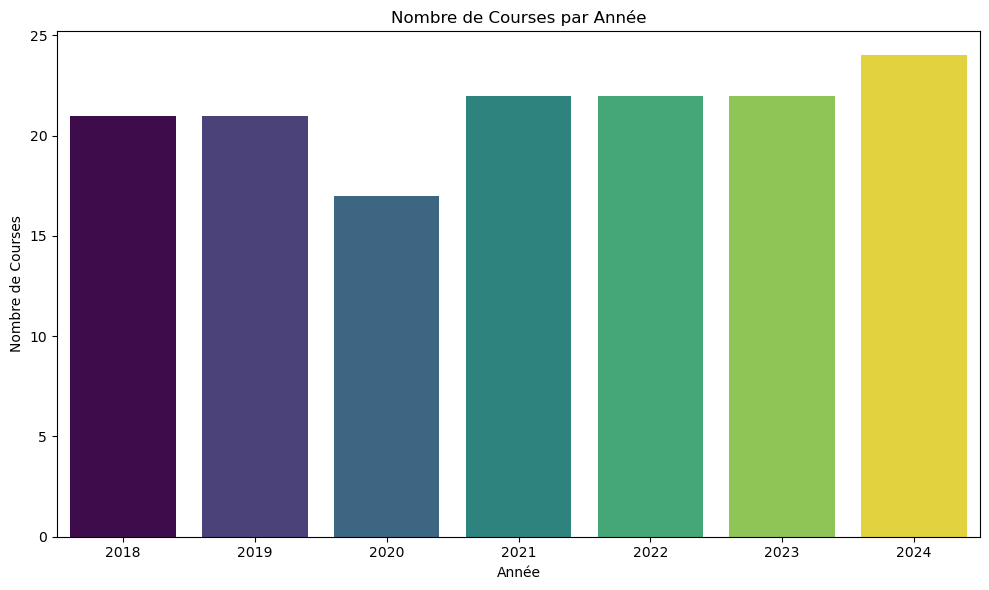

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_courses_per_year(courses_cleaned):
    """
    Visualisation du nombre de courses par année à partir de la colonne 'year'.
    
    Parameters:
    courses_cleaned (DataFrame) : Le DataFrame contenant les informations sur les courses.
    """
    # Compter le nombre de courses par année
    year_counts = courses_cleaned['year'].value_counts().sort_index()

    # Créer un barplot pour afficher les courses par année
    plt.figure(figsize=(10, 6))
    sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette='viridis', legend=False)

    # Ajouter des titres et labels
    plt.title('Nombre de Courses par Année')
    plt.xlabel('Année')
    plt.ylabel('Nombre de Courses')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Utilisation de la fonction
plot_courses_per_year(courses_cleaned)

L'analyse du nombre de courses par année révèle une certaine constance dans l'organisation des Grands Prix de la Formule 1, à l'exception notable de l'année 2020. En effet, la saison 2020 a comptabilisé seulement 17 courses, ce qui est inférieur à la moyenne des autres années. Cette baisse est principalement due à l'impact de la pandémie de COVID-19, qui a perturbé le calendrier de nombreuses compétitions sportives, y compris la F1. Des restrictions de voyage et des mesures sanitaires ont contraint les organisateurs à annuler ou reporter plusieurs événements.

En revanche, les années 2021, 2022, 2023 et 2024 ont retrouvé un nombre de courses plus proche de la normale, avec 22 à 24 courses par saison, indiquant que la F1 a pu se stabiliser après la crise sanitaire mondiale.

/var/folders/l9/dhmb1tyx1h37xyzk_tmmg0hr0000gn/T/ipykernel_70422/1047972480.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prix_counts.values, y=prix_counts.index, palette='viridis', legend=False)


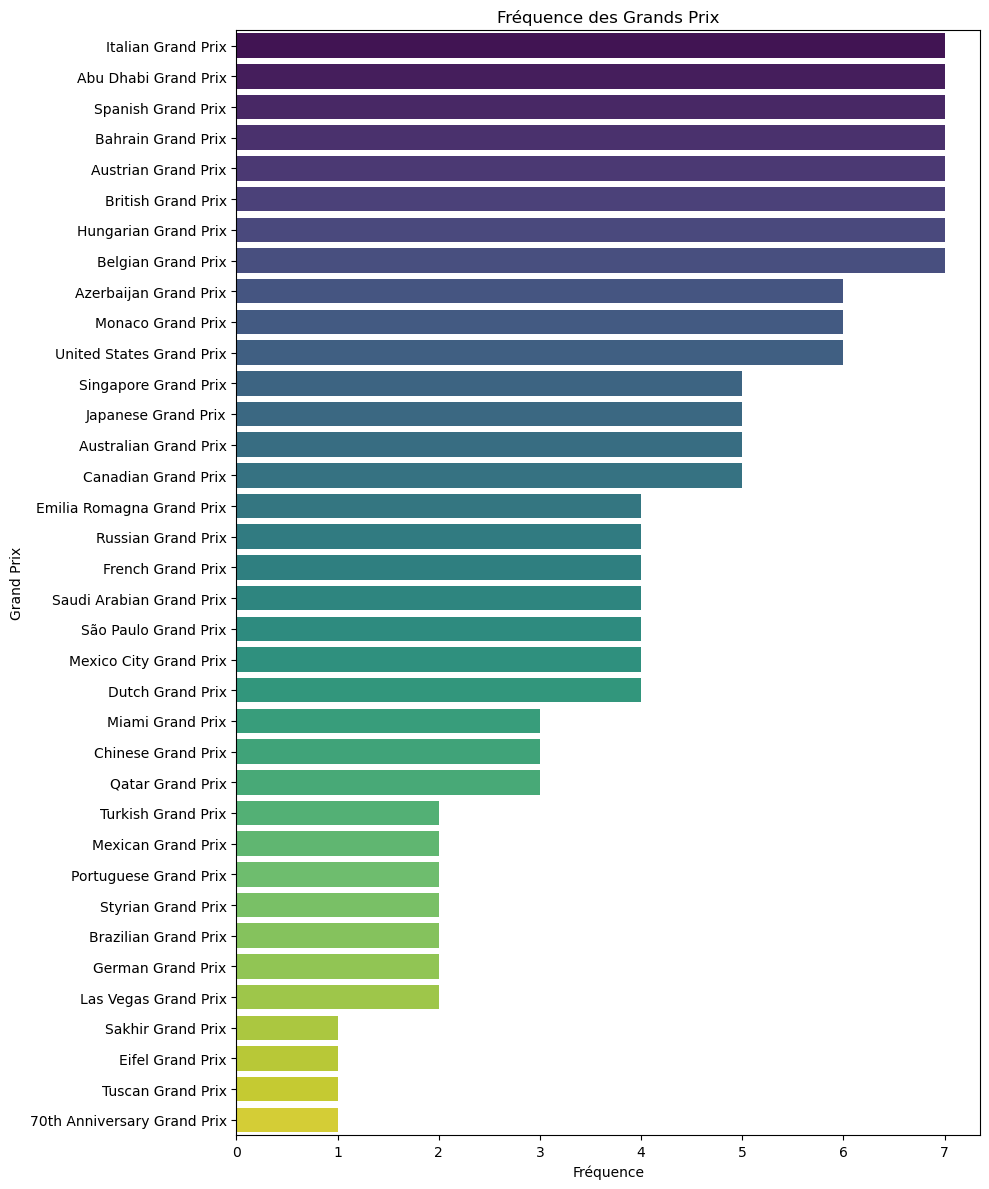

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grand_prix_vertical(courses_cleaned):
    """
    Visualisation verticale de la fréquence des grands prix (nom) dans le DataFrame.
    
    Parameters:
    courses_cleaned (DataFrame) : Le DataFrame contenant les informations sur les grands prix.
    """
    # Compter la fréquence de chaque grand prix
    prix_counts = courses_cleaned['name'].value_counts()

    # Créer un barplot vertical
    plt.figure(figsize=(10, 12))
    sns.barplot(x=prix_counts.values, y=prix_counts.index, palette='viridis', legend=False)

    # Ajouter des titres et labels
    plt.title('Fréquence des Grands Prix')
    plt.ylabel('Grand Prix')
    plt.xlabel('Fréquence')

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

# Utilisation de la fonction
plot_grand_prix_vertical(courses_cleaned)

Les grands prix les plus fréquents sont :

- Italian Grand Prix
- Abu Dhabi Grand Prix
- Spanish Grand Prix
- Bahrain Grand Prix
- Austrian Grand Prix
- British Grand Prix
- Hungarian Grand Prix
- Belgian Grand Prix

Ces circuits, très populaires et traditionnels, accueillent souvent plusieurs courses au cours des saisons, en raison de leur engagement historique et de leur grande visibilité auprès des spectateurs et des médias.

## 3. Analyse descriptive des resultats

In [14]:
# Afficher les 5 premières lignes
resultat_cleaned.head()

,resultId,raceId,driverId,positionOrder,points,laps,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,10.0,58,1:27.452,218.300,1
1,2,18,2,2,8.0,58,1:27.739,217.586,1
2,3,18,3,3,6.0,58,1:28.090,216.719,1
3,4,18,4,4,5.0,58,1:28.603,215.464,1
4,5,18,5,5,4.0,58,1:27.418,218.385,1


In [15]:
resultat_cleaned.describe()

,resultId,raceId,driverId,positionOrder,points,laps,statusId
count,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000,26519.000000
mean,13260.940986,546.376560,274.357291,12.814812,1.959578,46.228251,17.317056
std,7656.813206,309.642244,279.275606,7.677869,4.306475,29.577860,26.081700
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,6630.500000,298.000000,57.000000,6.000000,0.000000,23.000000,1.000000
50%,13260.000000,527.000000,170.000000,12.000000,0.000000,53.000000,10.000000
75%,19889.500000,803.000000,385.000000,18.000000,2.000000,66.000000,14.000000
max,26524.000000,1132.000000,860.000000,39.000000,50.000000,200.000000,141.000000


### Top 10 des pilotes depuis 2018

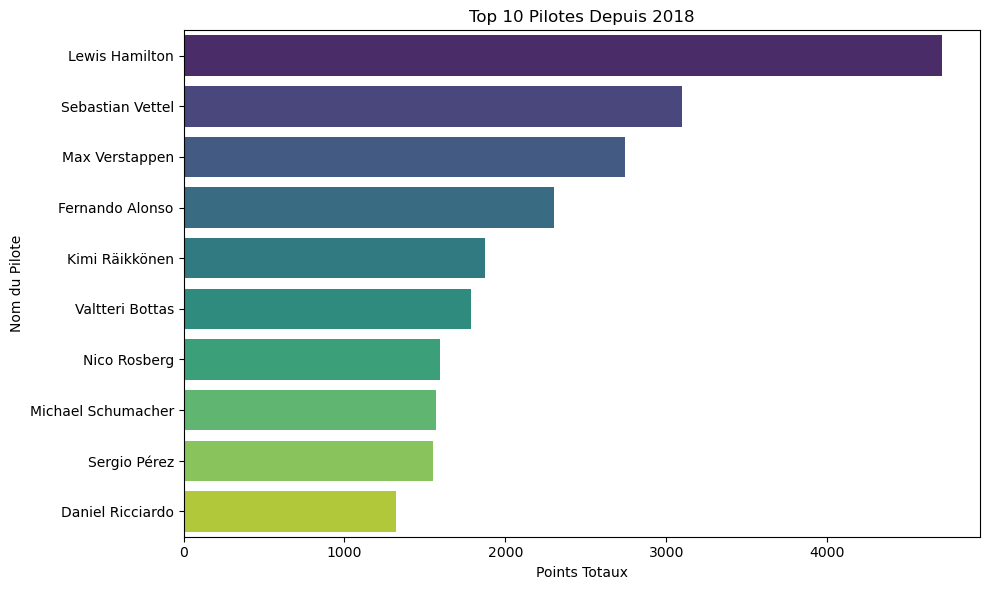

            Nom Complet  points
521      Lewis Hamilton  4713.5
763    Sebastian Vettel  3098.0
569      Max Verstappen  2744.5
256     Fernando Alonso  2304.0
500      Kimi Räikkönen  1873.0
829     Valtteri Bottas  1788.0
612        Nico Rosberg  1594.5
576  Michael Schumacher  1566.0
766        Sergio Pérez  1552.0
170    Daniel Ricciardo  1319.0


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionner les résultats des courses avec les informations des pilotes pour obtenir les noms complets
resultat_with_names = pd.merge(resultat_cleaned, pilotes_cleaned[['driverId', 'forename', 'surname']], on='driverId')

# Créer une colonne 'Nom Complet' qui combine le prénom et le nom
resultat_with_names['Nom Complet'] = resultat_with_names['forename'] + ' ' + resultat_with_names['surname']

# Regrouper les résultats par pilote et calculer le total des points pour chaque pilote
total_points = resultat_with_names.groupby('Nom Complet')['points'].sum().reset_index()

# Trier les pilotes par les points (décroissant) et sélectionner les 10 meilleurs
top_pilotes = total_points.sort_values(by='points', ascending=False).head(10)

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='Nom Complet', data=top_pilotes, palette='viridis', legend=False, hue='Nom Complet')
plt.title('Top 10 Pilotes Depuis 2018')
plt.xlabel('Points Totaux')
plt.ylabel('Nom du Pilote')
plt.tight_layout()
plt.show()

# Afficher les résultats sous forme de tableau pour plus de détails
print(top_pilotes[['Nom Complet', 'points']])

### Les champions du Formula 1 depuis 2018

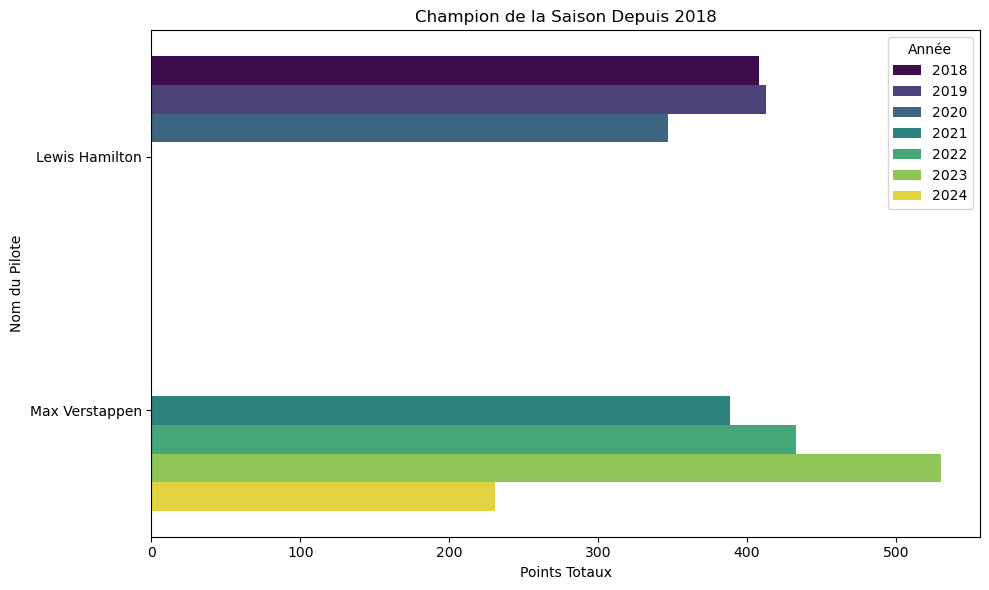

       year     Nom Complet  points
9    2018.0  Lewis Hamilton   408.0
31   2019.0  Lewis Hamilton   413.0
53   2020.0  Lewis Hamilton   347.0
74   2021.0  Max Verstappen   388.5
96   2022.0  Max Verstappen   433.0
120  2023.0  Max Verstappen   530.0
141  2024.0  Max Verstappen   231.0


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fusionner le DataFrame 'resultat_cleaned' avec 'courses_cleaned' pour obtenir l'année des courses
resultat_with_year = pd.merge(resultat_cleaned, courses_cleaned[['raceId', 'year']], on='raceId', how='left')

# Fusionner le DataFrame des résultats avec les informations des pilotes pour obtenir le nom complet
resultat_with_names = pd.merge(resultat_with_year, pilotes_cleaned[['driverId', 'forename', 'surname']], on='driverId')

# Créer une colonne 'Nom Complet' en combinant 'forename' et 'surname'
resultat_with_names['Nom Complet'] = resultat_with_names['forename'] + ' ' + resultat_with_names['surname']

# Regrouper par année et pilote et calculer le total des points pour chaque pilote par année
points_by_year = resultat_with_names.groupby(['year', 'Nom Complet'])['points'].sum().reset_index()

# Trier par année puis par points de manière décroissante
points_by_year_sorted = points_by_year.sort_values(by=['year', 'points'], ascending=[True, False])

# Sélectionner le champion (le pilote avec le plus de points) pour chaque saison
champions_per_year = points_by_year_sorted.groupby('year').head(1)

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='Nom Complet', hue='year', data=champions_per_year, palette='viridis')
plt.title('Champion de la Saison Depuis 2018')
plt.xlabel('Points Totaux')
plt.ylabel('Nom du Pilote')
plt.legend(title='Année', loc='upper right')
plt.tight_layout()
plt.show()

# Afficher les résultats sous forme de tableau
print(champions_per_year[['year', 'Nom Complet', 'points']])